<a href="https://colab.research.google.com/github/Songhyunjeong/thingplug-lora-starter-kit/blob/master/%ED%82%A4%EC%9B%8C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;신규&#41; Gemini API를 사용해 보세요</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  plt.tight_layout()
<ipython-input-21-45e2e2173bfe>:64: UserWarning: Glyph 48

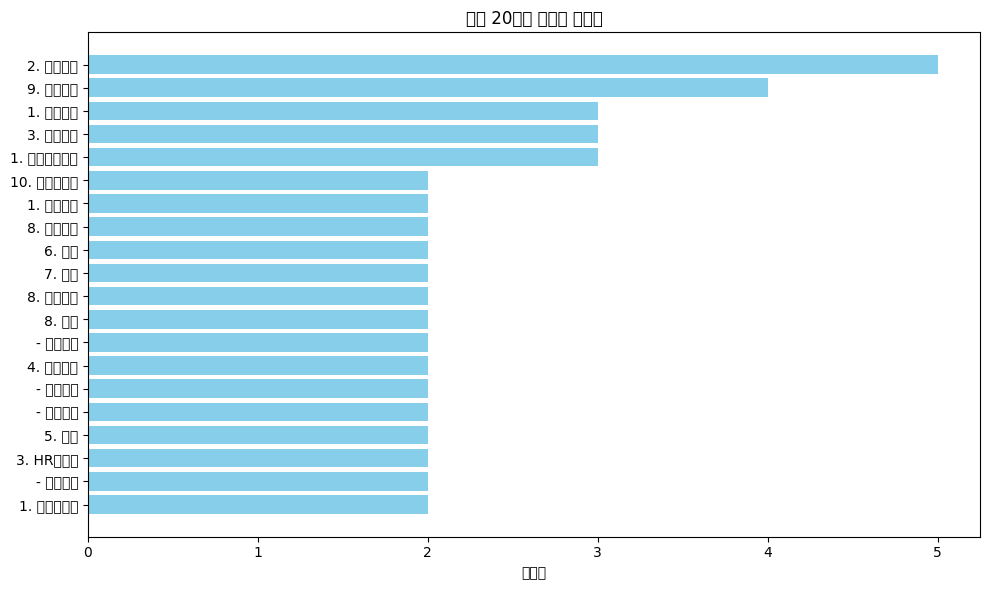

        Word 1    Word 2  Word 3  Word 4 Word 5 Word 6 Word 7 Word 8 Word 9  \
Topic 1     사업        개발     392      안내     00    000     회사     기타     제공   
Topic 2    다양한      2023    프로그램      또한     11     의료    경험을     취업     직무   
Topic 3    com      존재하지  이미지입니다      않는  kakao  https  naver  강아지분양    010   
Topic 4    외국인       성과급     고정급     공제전     최대   900원     00     co   신한서브   
Topic 5     or  통해보더콜리분양     1호선  첫만남이용권     ㅠㅠ    기존에   있을까요   with     둘째   

              Word 10  
Topic 1            일반  
Topic 2            사회  
Topic 3     instagram  
Topic 4  shinhanserve  
Topic 5           지원을  


In [ ]:
import pandas as pd
import ast
from collections import Counter
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = '/content/drive/MyDrive/claw/키워드추출.csv'
data = pd.read_csv(file_path)

# 2. 제외하고 싶은 단어 리스트 정의 (부사, 어미, 의존 명사, 패턴)
adverbs_endings = ["로", "은", "는", "를", "에", "가", "의", "으로", "로서", "하게", "해", "적", "이", "하다", "있다", "ㅠㅠ"]
dependent_nouns = ["것", "수", "바", "점", "지", "데", "리", "줄", "터", "때", "뿐", "편"]
particles = ["이", "가", "을", "를", "에", "에서", "와", "과", "은", "는", "도", "만", "처럼", "까지", "부터", "에게", "로", "으로", "의", "에게서", "밖에", "같이"]
patterns_to_filter = ["것은", "것으로", "것이", "하는"]

# Function to check if a word matches adverbs, endings, dependent nouns, or specific patterns
def is_adverb_ending_or_dependent_with_particle(word):
    # Check for adverbs or endings
    if any(word.endswith(ending) for ending in adverbs_endings):
        return True
    # Check for dependent nouns
    if word in dependent_nouns:
        return True
    # Check for dependent noun + particle combinations
    for noun in dependent_nouns:
        for particle in particles:
            if word == noun + particle:
                return True
    # Check for specific patterns like "것은", "것이", "것으로", etc.
    if word in patterns_to_filter:
        return True
    return False

# 3. 키워드 빈도 분석

# 키워드 컬럼 전처리
data_cleaned = data.dropna(subset=['Keywords']).copy()
data_cleaned['Keywords'] = data_cleaned['Keywords'].apply(lambda x: ast.literal_eval(x))

# 제외하고 싶은 단어들을 키워드 리스트에서 제거
data_cleaned['Keywords'] = data_cleaned['Keywords'].apply(
    lambda keywords: [kw for kw in keywords if not is_adverb_ending_or_dependent_with_particle(kw)]
)

# 모든 키워드를 하나의 리스트로 추출
all_keywords = [keyword for keywords_list in data_cleaned['Keywords'] for keyword in keywords_list]

# 키워드 빈도 계산
keyword_freq = Counter(all_keywords)
keyword_freq_df = pd.DataFrame(keyword_freq.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

# 키워드 빈도 그래프 생성
top_n = 20
top_keywords = keyword_freq_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Frequency'], color='skyblue')
plt.xlabel('빈도수')
plt.title(f'상위 {top_n}개의 키워드 빈도수')
plt.gca().invert_yaxis()  # y축을 역순으로 정렬하여 빈도가 높은 키워드가 위로 오도록 설정
plt.tight_layout()
plt.show()

# 4. 키워드 연관성 분석 (동시출현 빈도)

# 키워드 쌍 생성
keyword_pairs = []
for keywords_list in data_cleaned['Keywords']:
    keyword_pairs.extend(combinations(keywords_list, 2))

# 키워드 쌍 빈도 계산
keyword_pair_freq = Counter(keyword_pairs)
keyword_pair_freq_df = pd.DataFrame(keyword_pair_freq.items(), columns=['Keyword Pair', 'Frequency']).sort_values(by='Frequency', ascending=False)

# 5. 토픽 모델링 (LDA)

# 텍스트 데이터 전처리
data_text_cleaned = data.dropna(subset=['Column4']).copy()

# 제외하고 싶은 단어 리스트 추가 (stop_words 정의)
stop_words = ['신한카드', '네이버', '국민행복카드', '저는', '제가', '너무', '어떻게', '다들', '합니다', '입니다', '같아요',
              '있습니다', '있어요', '해요', '많이', '최근', '때문에', '한다', '따른', '하세요', '있는', '대한', '등의', '저희', '위해',
               '것으로','것은','것이','또는','통해','대하여','있으며', '있는','하는','따라','가장',
              '많은','혹시', '있고','단지','관련','있도록' ]

# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=stop_words)
dtm = vectorizer.fit_transform(data_text_cleaned['Column4'])

# LDA 모델 적용
lda = LatentDirichletAllocation(n_components=19, random_state=42)
lda.fit(dtm)

# 토픽별 상위 단어 추출 함수 정의
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f'Topic {topic_idx + 1}'] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

# 토픽별 상위 단어 추출 및 데이터프레임 생성
no_top_words = 10
lda_topics = display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)
topics_df = pd.DataFrame.from_dict(lda_topics, orient='index', columns=[f'Word {i+1}' for i in range(no_top_words)])

# 토픽 결과 출력
print(topics_df.head())

Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  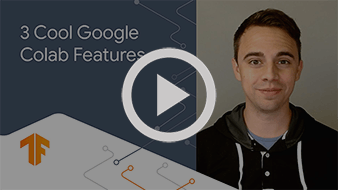
  </a>
</center>

In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import re

# Okt 형태소 분석기
okt = Okt()

# 데이터 로드
file_path = '/content/drive/MyDrive/claw/filtered_output_file_육아나눔터.csv'
df = pd.read_csv(file_path)
# df['Column4']에 텍스트 데이터가 있다고 가정합니다.

# 1. 전처리 함수 정의 (특수문자 제거, 명사 추출)
def preprocess_and_extract_nouns(text):
    if isinstance(text, str):  # 문자열인지 확인
        # 특수문자 제거
        text = re.sub(r'[^가-힣\s]', '', text)
        # 명사만 추출
        nouns = okt.nouns(text)
        return ' '.join(nouns)
    else:
        return ''  # 문자열이 아닌 경우 빈 문자열 반환

# 2. Column4에 대해 전처리 및 명사 추출 적용
df['Processed_Column4'] = df['본문'].apply(preprocess_and_extract_nouns)

# 3. CountVectorizer로 텍스트 데이터 벡터화
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['Processed_Column4'])

# 4. 최적의 토픽 수 결정 (GridSearchCV)
search_params = {'n_components': list(range(5, 21))}  # 5개에서 20개 사이의 토픽 개수를 탐색
lda = LatentDirichletAllocation(random_state=42)
model = GridSearchCV(lda, param_grid=search_params, scoring='neg_log_loss', cv=3)
model.fit(X)

# 최적의 토픽 수 출력
best_n_topics = model.best_params_['n_components']
print(f"최적의 토픽 개수는 {best_n_topics} 입니다.")

# 최적의 LDA 모델로 다시 학습
best_lda_model = model.best_estimator_

# 5. 주요 키워드 추출 함수 정의
def get_top_keywords(model, feature_names, n_top_words):
    topics_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        top_keywords = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics_keywords.append(top_keywords)
    return topics_keywords

# 단어 목록 추출
feature_names = vectorizer.get_feature_names_out()

# 주제별 주요 키워드 추출
n_top_words = 20  # 추출할 주요 키워드의 수
topics_keywords = get_top_keywords(best_lda_model, feature_names, n_top_words)

# 6. 주제 키워드 출력
for i, keywords in enumerate(topics_keywords):
    print(f"주제 {i+1}:")
    print(", ".join(keywords))
    print("\n")

<div class="markdown-google-sans">
  <h2>Colab이란?</h2>
</div>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다.
- 구성이 필요하지 않음
- 무료로 GPU 사용
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

<div class="markdown-google-sans">

## <strong>시작하기</strong>
</div>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

<div class="markdown-google-sans">

## 데이터 과학
</div>

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

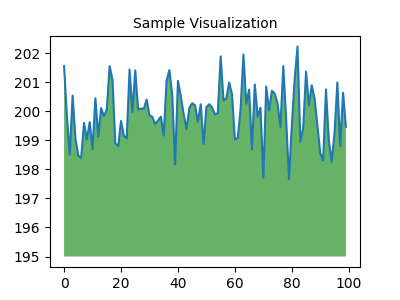

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

<div class="markdown-google-sans">

## 머신러닝
</div>

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝 단기집중과정

<div>

다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
